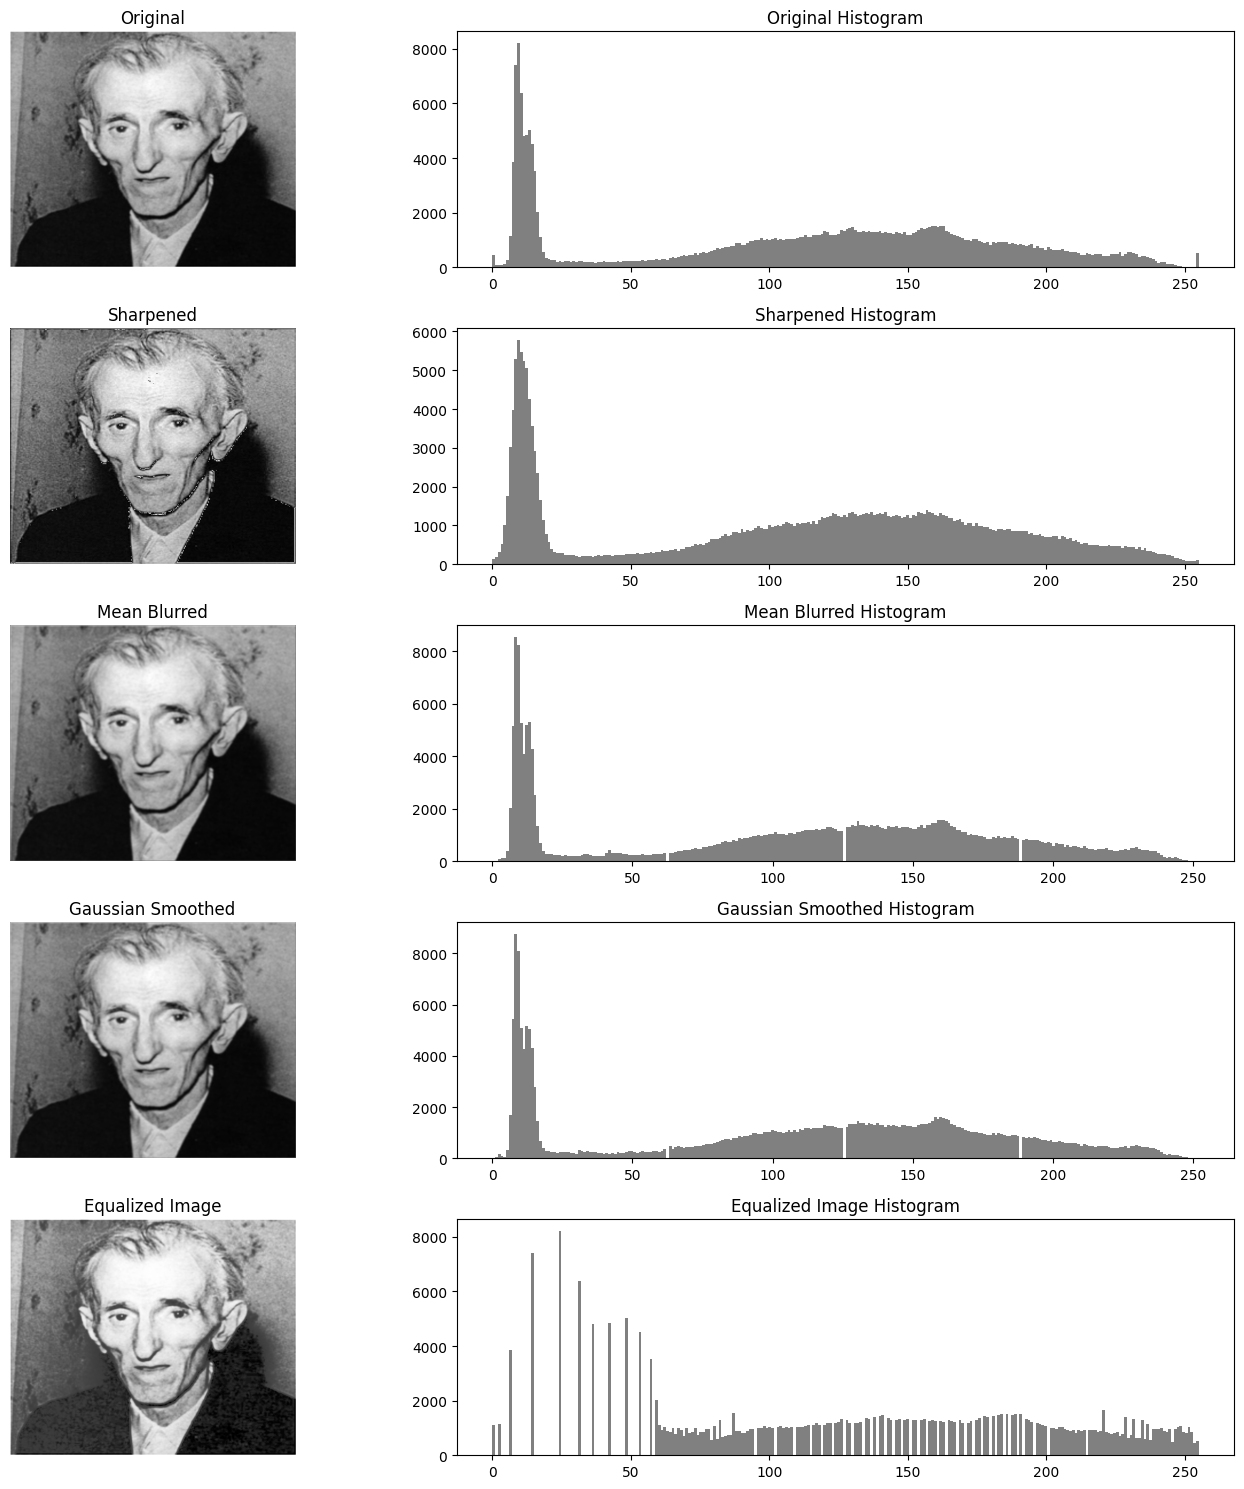

In [2]:
import cv2,numpy as np,matplotlib.pyplot as plt
image = cv2.imread("nikolatesla.png", cv2.IMREAD_GRAYSCALE)
def apply_convolution(image, kernel):

    kernel_size = kernel.shape[0]
    pad = kernel_size // 2
    image_padded = np.pad(image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            region = image_padded[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.sum(region * kernel)
    return np.clip(output, 0, 255).astype(np.uint8)

# Sharpening Kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened_image = apply_convolution(image, sharpen_kernel)

#  Blurring (Mean Filter)
mean_kernel = np.ones((3,3)) / 9
blurred_image = apply_convolution(image, mean_kernel)

#  Smoothing (Gaussian Filter)
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16
gaussian_blurred_image = apply_convolution(image, gaussian_kernel)



fig, axes = plt.subplots(5, 2, figsize=(15, 15))
def plot_image_with_histogram(img, ax_img, ax_hist, title):
    ax_img.imshow(img, cmap='gray')
    ax_img.set_title(title)
    ax_img.axis('off')  # Hide axis for images
    ax_hist.hist(img.ravel(), bins=256, color='gray')
    ax_hist.set_title(f'{title} Histogram')
plot_image_with_histogram(image, axes[0, 0], axes[0, 1], 'Original')
plot_image_with_histogram(sharpened_image, axes[1, 0], axes[1, 1], 'Sharpened')
plot_image_with_histogram(blurred_image, axes[2, 0], axes[2, 1], 'Mean Blurred')
plot_image_with_histogram(gaussian_blurred_image, axes[3, 0], axes[3, 1], 'Gaussian Smoothed')

histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
cdf = histogram.cumsum()

cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = cdf_normalized.astype(np.uint8)

equalized_image_manual = cdf_normalized[image]
plot_image_with_histogram(equalized_image_manual, axes[4, 0], axes[4, 1], 'Equalized Image')

plt.tight_layout()
plt.show()






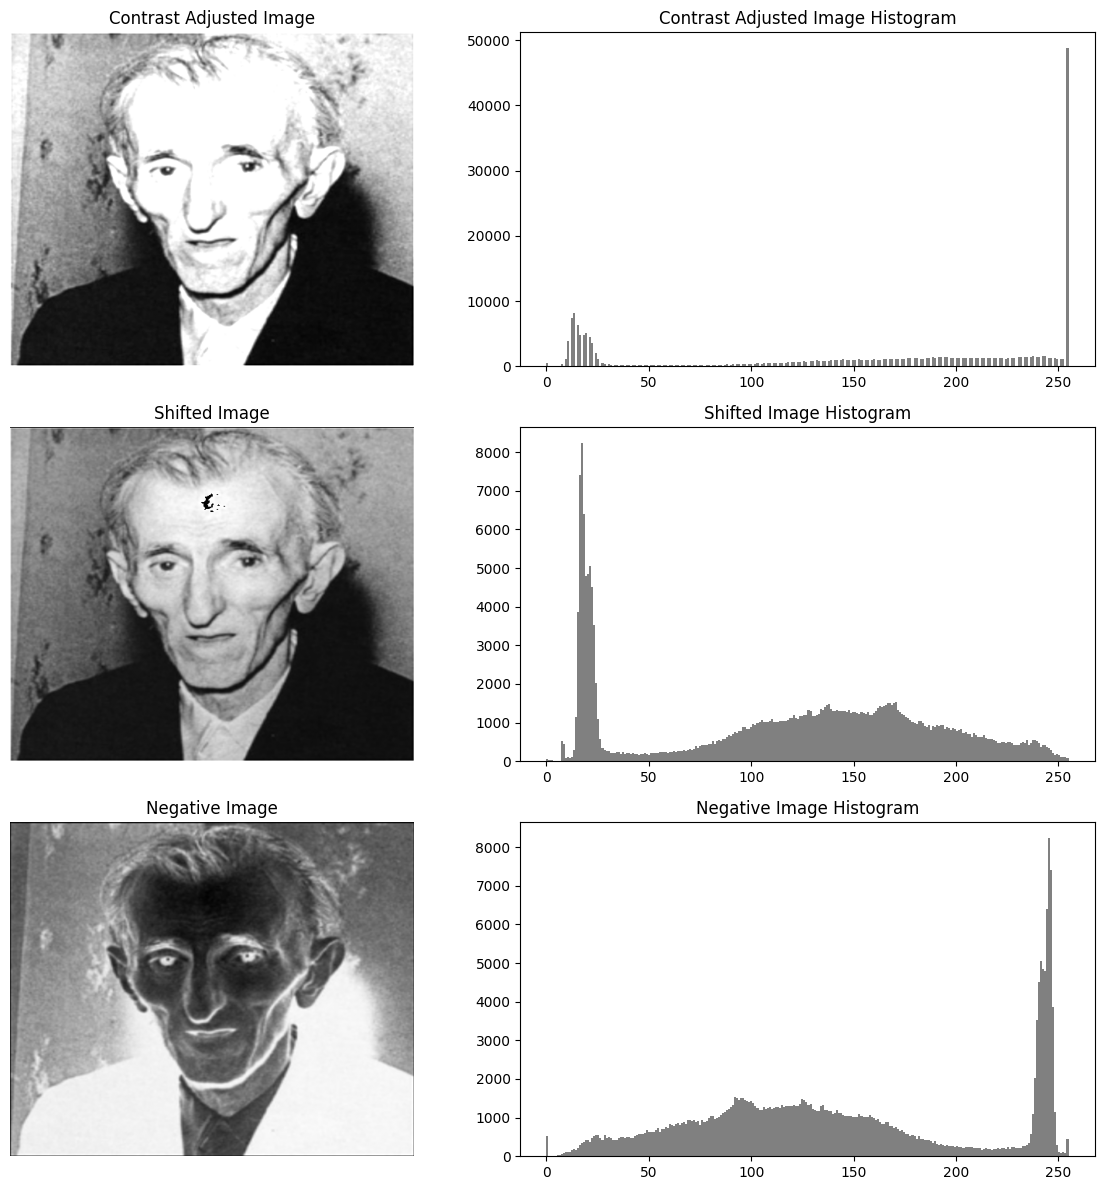

In [8]:



# Shifting: Add a constant value to each pixel to shift the image
shift_value = 8 # Add a constant value to shift the image
shifted_image = np.clip(image + shift_value, 0, 255).astype(np.uint8)

# Contrast adjustment: Use a scaling factor alpha and an offset beta
alpha = 1.5  # Contrast scaling factor
beta = 0     # Brightness offset
contrast_image = np.clip(alpha * image + beta, 0, 255).astype(np.uint8)

# Negative transformation: Invert the pixel values
negative_image = 255 - image

# Create a 2x2 grid for displaying the images and their histograms
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

plot_image_with_histogram(contrast_image, axes[0,0], axes[0,1], 'Contrast Adjusted Image')

# Display shifted image with histogram
plot_image_with_histogram(shifted_image, axes[1, 0], axes[1, 1], 'Shifted Image')

plot_image_with_histogram(negative_image, axes[2,0], axes[2,1], 'Negative Image')

# Show the plot
plt.tight_layout()
plt.show()
